# **Summary**

This data science project analyzed employee performance at INX Future Inc. The goal was to determine the factors that impact performance and develop a model to predict performance for hiring purposes. The project involved analyzing various features such as work experience, gender, department, and current role. The dataset consisted of 1200 well-structured data points with 28 features. Machine learning models, specifically random forest and gradient boosted classifiers, were used to achieve a high accuracy of around 92%.

The project identified department-wise performances, with data analyzed for each department individually. The top three factors influencing performance were found to be employment environment satisfaction, employee salary hike percentage, and years since the last promotion.

Recommendations for improving employee performance included focusing on improving the work environment, providing salary hikes, offering promotions, considering work-life balance, prioritizing female candidates for HR roles, and recognizing the higher performance of the development and data science departments.

In summary, this project successfully analyzed employee performance, identified key factors affecting it, developed a predictive model, and provided recommendations for improvement.

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedShuffleSplit




import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_excel("//content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

 **Basic Checks**

In [ ]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [ ]:
df.columns = [column.lower() for column in df.columns]


In [ ]:
df.drop(['empnumber'],axis=1,inplace=True)

In [ ]:
df.shape


(1200, 27)

In [ ]:
df.describe()

,age,distancefromhome,empeducationlevel,empenvironmentsatisfaction,emphourlyrate,empjobinvolvement,empjoblevel,empjobsatisfaction,numcompaniesworked,emplastsalaryhikepercent,emprelationshipsatisfaction,totalworkexperienceinyears,trainingtimeslastyear,empworklifebalance,experienceyearsatthiscompany,experienceyearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,performancerating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


The dataset provides information about various aspects of employee demographics, job characteristics, and performance ratings.

Overall, the employees in the dataset have an average age of 36.9 years and a moderate level of education.
 They tend to have a reasonable commute distance from home and report moderate levels of satisfaction with their work environment, job involvement, job level, and job satisfaction.

 The dataset also indicates that employees have worked for multiple companies, with an average of 15.2 companies, and have a varied range of total work experience. The average number of training sessions attended in the last year is 2.8.

 Employees generally report moderate levels of relationship satisfaction and work-life balance.

 The dataset shows that employees have spent an average of 7.1 years with their current company and have approximately 4.3 years of experience in their current role.

 On average, they have experienced a promotion every 2.2 years. The average performance rating is 3, indicating a relatively satisfactory level of performance.








In [ ]:
df.describe(include=['O'])

,empnumber,gender,educationbackground,maritalstatus,empdepartment,empjobrole,businesstravelfrequency,overtime,attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


The dataset consists of 1,200 employees, each uniquely identified by an employee number.

The majority of employees in the dataset are male, with a frequency of 725 out of 1,200.

Life Sciences is the most common education background among employees, with 492 occurrences.

The majority of employees are married, with 548 instances.
Sales is the most prevalent department, with 373 employees working in this area.


The most frequent job role is Sales Executive, with 270 occurrences.


Travel_Rarely is the most common business travel frequency, reported by 846 employees.

Most employees (847 out of 1,200) do not work overtime.
The majority of employees (1,022 out of 1,200) have not experienced attrition.

These summary statistics provide an overview of the categorical variables in the dataset, offering insights into the composition and characteristics of the employee population under consideration.

### **Preprocessing**

In [ ]:
df.isna().values.any()

False

No missing values

In [ ]:
df.duplicated().sum()


0

No duplicate values

### **EDA**

In [ ]:
def plot_histogram_kde(data, x_var, y_var):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram with KDE
    sns.histplot(data[x_var], bins=10, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_xlabel(x_var)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'{x_var} Distribution')

    # KDE Plot
    sns.kdeplot(data=data, x=x_var, y=y_var,shade=True,cut=5,color='skyblue', ax=axes[1])
    axes[1].set_xlabel(x_var)
    axes[1].set_ylabel(y_var)
    axes[1].set_title(f'Kernel Density Estimation of {x_var} vs {y_var}')

    plt.tight_layout()
    plt.show()




In [ ]:
def plot_bar_kde(data, x_var, y_var):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram with KDE
    sns.countplot(data=data, x=x_var, color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_xlabel(x_var)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'{x_var} Distribution')

    # KDE Plot
    sns.kdeplot(data=data, x=x_var, y=y_var,shade=True,cut=5,color='skyblue', ax=axes[1])
    axes[1].set_xlabel(x_var)
    axes[1].set_ylabel(y_var)
    axes[1].set_title(f'Estimation of {x_var} vs {y_var}')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_kde_side_by_side(data, x_var1, y_var1, x_var2, y_var2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # KDE Plot 1
    sns.kdeplot(data=data, x=x_var1, y=y_var1,shade=True,ax=axes[0])
    axes[0].set_xlabel(x_var1)
    axes[0].set_ylabel(y_var1)
    axes[0].set_title(f'Estimation of {x_var1} vs {y_var1}')

    # KDE Plot 2
    sns.kdeplot(data=data, x=x_var2, y=y_var2, shade=True,ax=axes[1])
    axes[1].set_xlabel(x_var2)
    axes[1].set_ylabel(y_var2)
    axes[1].set_title(f'Estimation of {x_var2} vs {y_var2}')

    plt.tight_layout()
    plt.show()


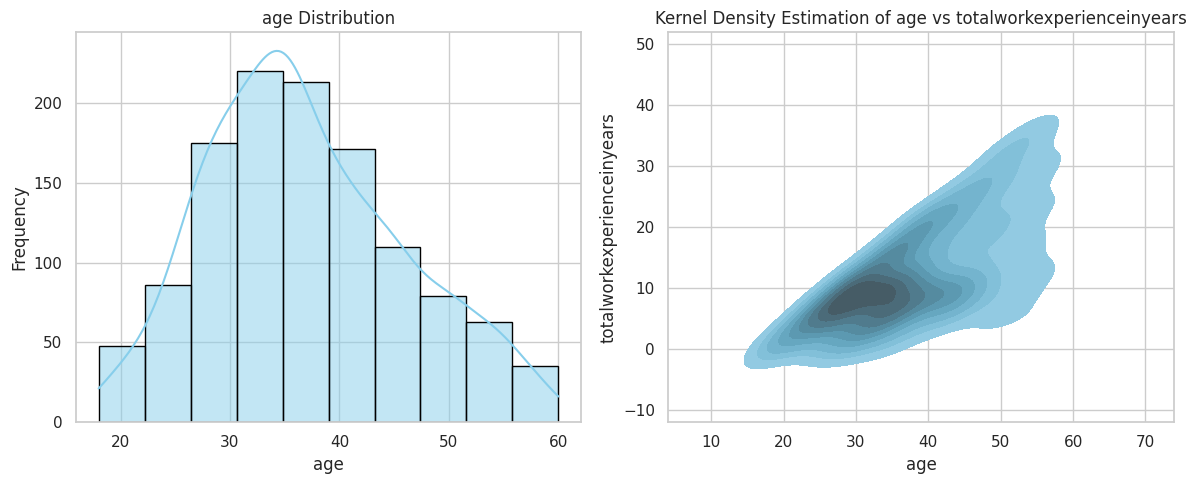

In [ ]:
plot_histogram_kde(df,'age','totalworkexperienceinyears')


In summary, the graph indicates that most employees in the dataset are in their 20s to 40s, and as they grow older, their work experience increases. This aligns with the expected pattern of career development and suggests that age plays a role in gaining professional expertise.

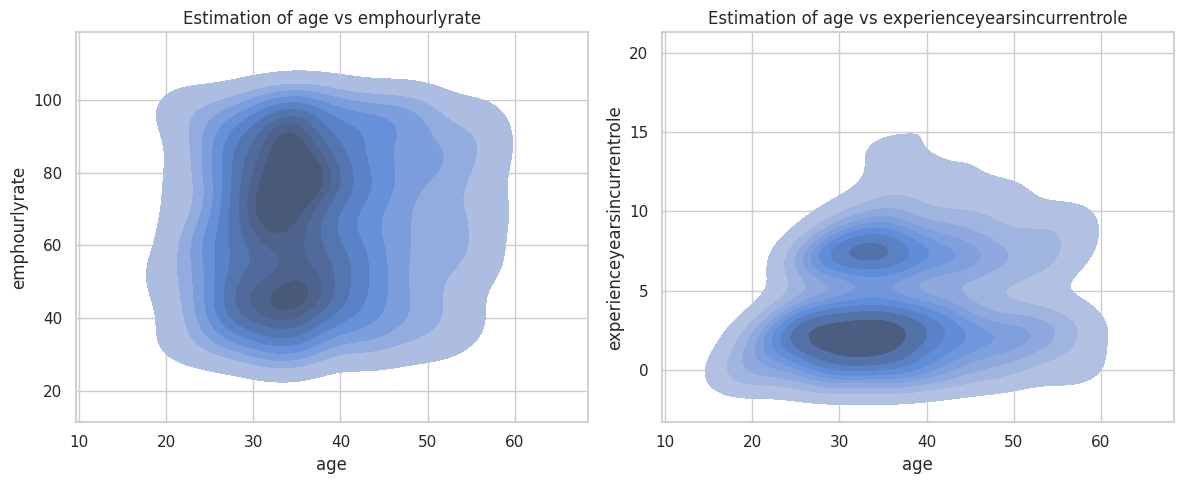

In [ ]:
plot_kde_side_by_side(df, 'age', 'emphourlyrate', 'age', 'experienceyearsincurrentrole')


The  plot show that as employees' age increases, both their hourly rate and experience years in their current role tend to increase. This suggests a positive relationship between age and these two features,

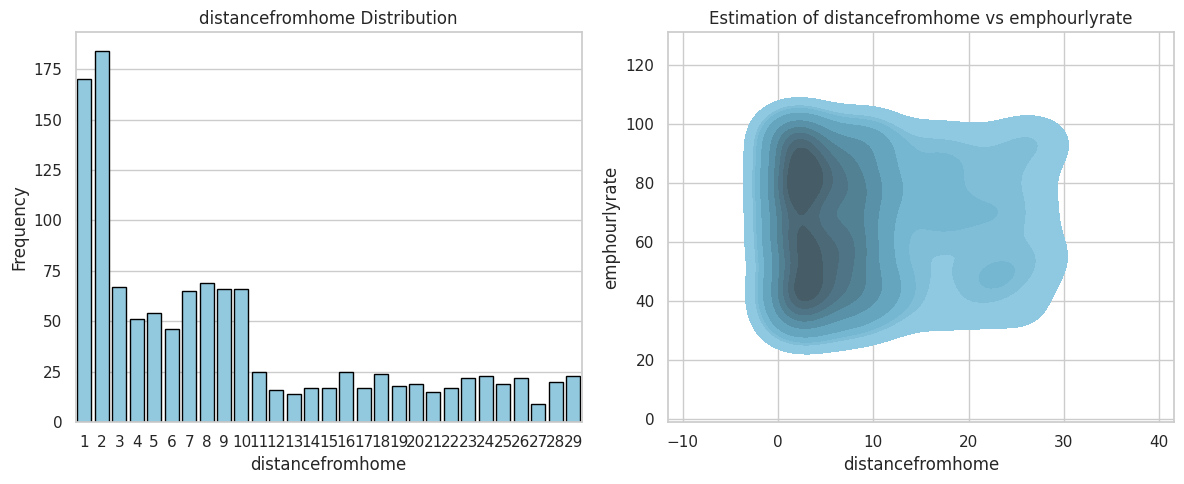

In [ ]:
plot_bar_kde(df,'distancefromhome','emphourlyrate')


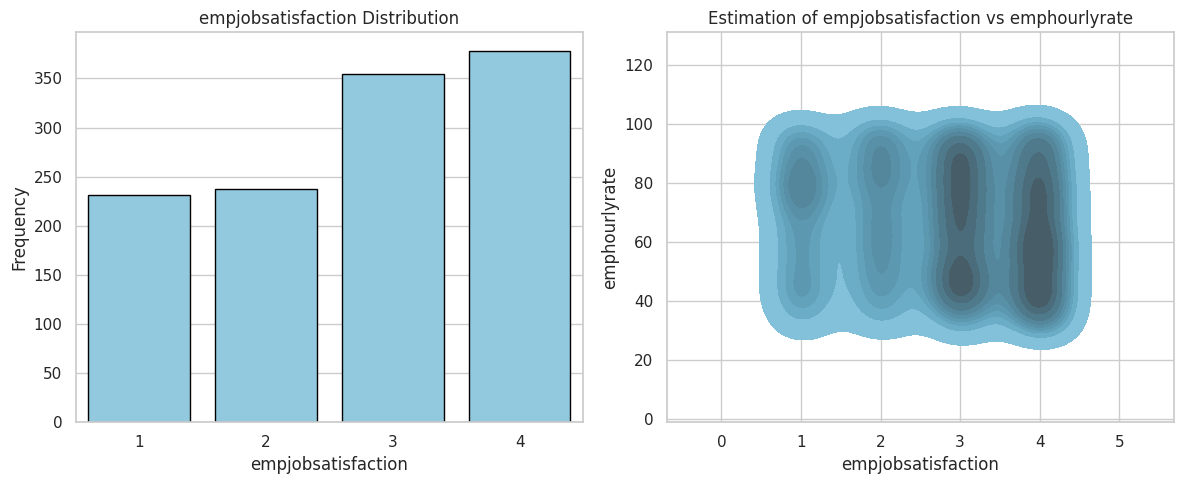

In [ ]:
plot_bar_kde(df,'empjobsatisfaction','emphourlyrate')

The plot indicates that there is a positive relationship between employee job satisfaction and hourly rate. Higher hourly rates are associated with higher levels of job satisfaction, suggesting the importance of fair compensation in fostering employee satisfaction within the organization.

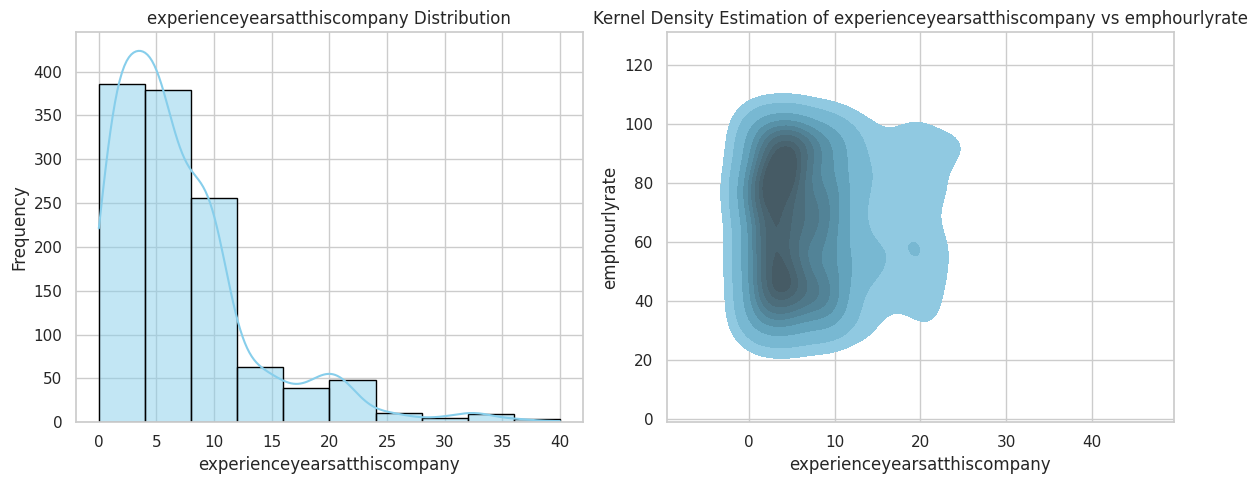

In [ ]:
plot_histogram_kde(df,'experienceyearsatthiscompany','emphourlyrate')

The plot demonstrates that as experience years at the current company increase, the hourly rate tends to increase as well. This suggests that employees who have been with the company for a longer duration are more likely to receive higher pay, reflecting the recognition of their experience and contribution to the organization.

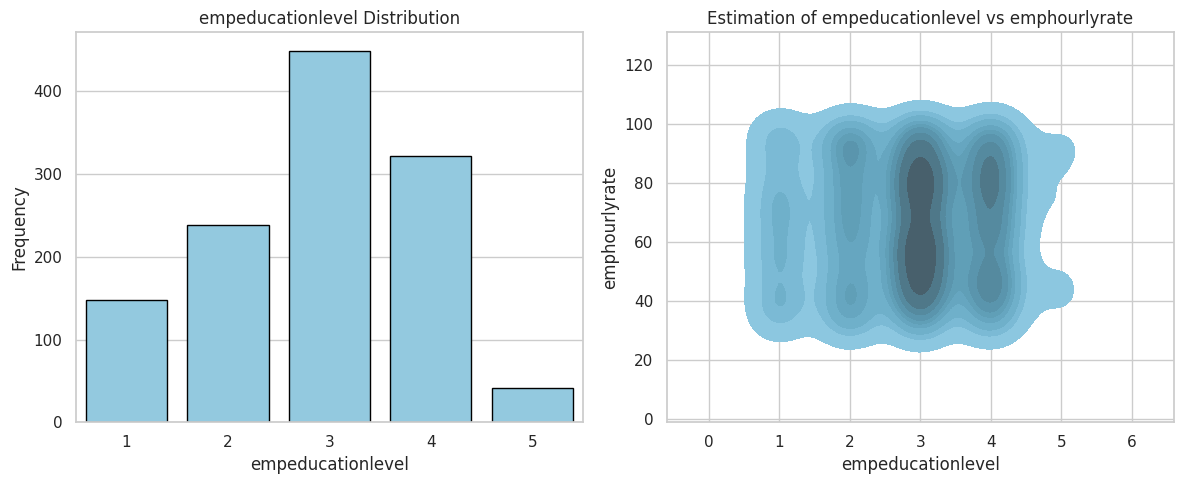

In [ ]:
plot_bar_kde(df,'empeducationlevel','emphourlyrate')

The plot demonstrates that there is a positive relationship between employee education level and hourly rate. Higher education levels are associated with higher hourly rates, indicating that companies value and reward employees with advanced knowledge and qualifications.

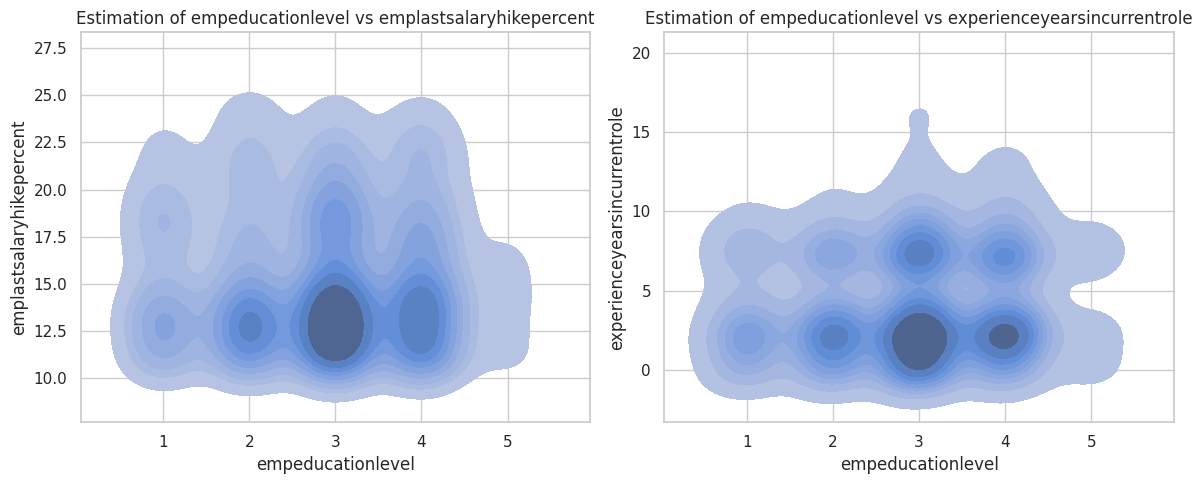

In [ ]:
plot_kde_side_by_side(df, 'empeducationlevel','emplastsalaryhikepercent', 'empeducationlevel', 'experienceyearsincurrentrole')

Plots indicate that employees with higher education levels tend to receive higher salary hike percentages and have more experience in their current roles. This suggests that education level plays a significant role in both salary progression and career advancement, with advanced education often correlating with increased opportunities for professional growth and higher compensation.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   empnumber                     1200 non-null   object
 1   age                           1200 non-null   int64 
 2   gender                        1200 non-null   object
 3   educationbackground           1200 non-null   object
 4   maritalstatus                 1200 non-null   object
 5   empdepartment                 1200 non-null   object
 6   empjobrole                    1200 non-null   object
 7   businesstravelfrequency       1200 non-null   object
 8   distancefromhome              1200 non-null   int64 
 9   empeducationlevel             1200 non-null   int64 
 10  empenvironmentsatisfaction    1200 non-null   int64 
 11  emphourlyrate                 1200 non-null   int64 
 12  empjobinvolvement             1200 non-null   int64 
 13  empjoblevel       

In [ ]:
df.groupby('empdepartment').count()

,empnumber,age,gender,educationbackground,maritalstatus,empjobrole,businesstravelfrequency,distancefromhome,empeducationlevel,empenvironmentsatisfaction,...,emprelationshipsatisfaction,totalworkexperienceinyears,trainingtimeslastyear,empworklifebalance,experienceyearsatthiscompany,experienceyearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition,performancerating
empdepartment,,,,,,,,,,,,,,,,,,,,,
Data Science,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Development,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361
Finance,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
Human Resources,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
Research & Development,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
Sales,373,373,373,373,373,373,373,373,373,373,...,373,373,373,373,373,373,373,373,373,373


**Sales:**

In [ ]:
sales = df[df.empdepartment == 'Sales']

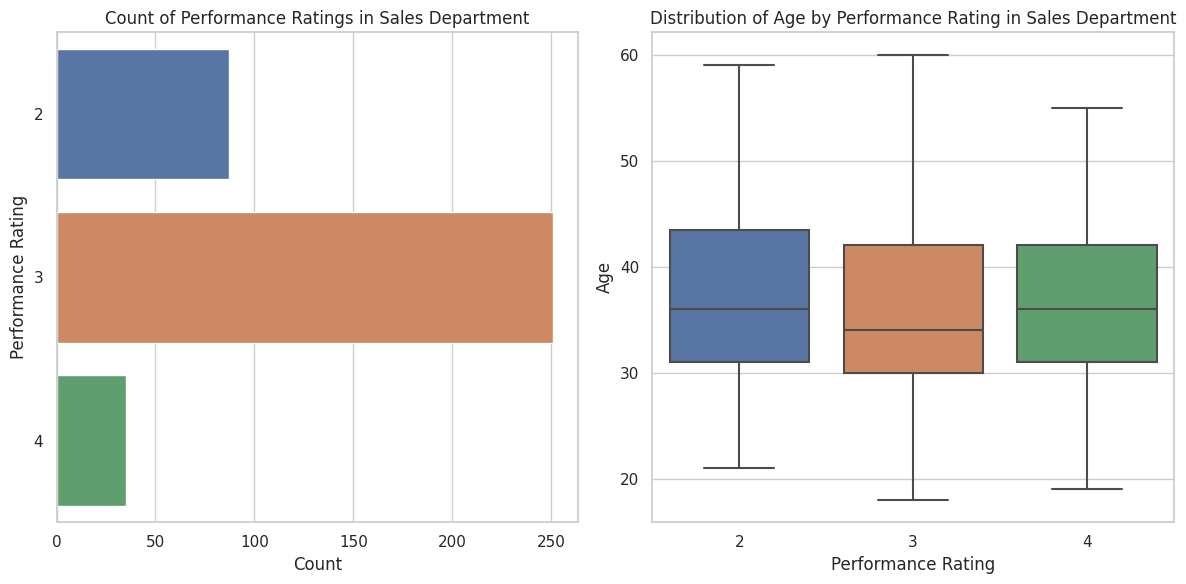

In [ ]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(y='performancerating', data=sales, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Performance Rating')
axes[0].set_title('Count of Performance Ratings in Sales Department')

sns.boxplot(x='performancerating', y='age', data=sales, ax=axes[1])
axes[1].set_xlabel('Performance Rating')
axes[1].set_ylabel('Age')
axes[1].set_title('Distribution of Age by Performance Rating in Sales Department')

plt.tight_layout()

plt.show()

The majority of employees in the sales department have a performance rating of 3, followed by ratings of 2 and 4. The average ages for different performance ratings are relatively similar, with slight variations.

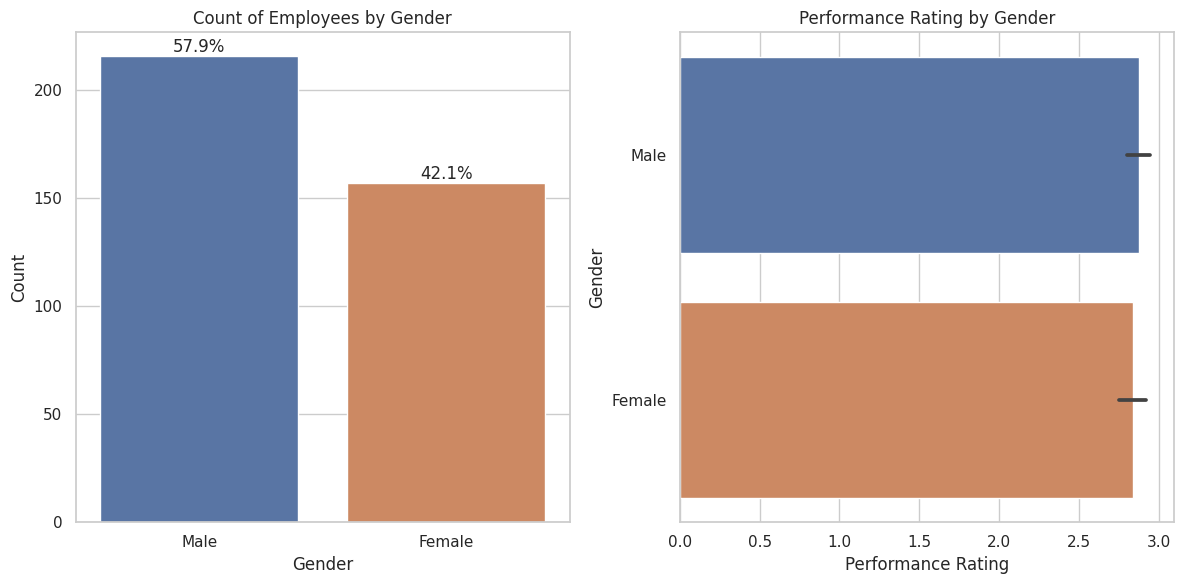

In [ ]:
gender_counts = sales['gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Employees by Gender')

total = len(sales)
for p in axes[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0].annotate(percentage, (x, y), ha='center', va='bottom')


sns.barplot(x='performancerating', y='gender', data=sales, ax=axes[1])
axes[1].set_xlabel('Performance Rating')
axes[1].set_ylabel('Gender')
axes[1].set_title('Performance Rating by Gender')


plt.tight_layout()


plt.show()


The sales department has a slightly higher representation of male employees compared to female employees. The performance ratings are generally balanced across genders, with a considerable number of employees achieving a rating of 3.

In [ ]:
experience_columns = ['totalworkexperienceinyears', 'experienceyearsatthiscompany', 'experienceyearsincurrentrole']


In [ ]:
experience_data = sales[experience_columns + ['performancerating']]


In [ ]:
melted_data = experience_data.melt(id_vars='performancerating', var_name='experiencelevel', value_name='years')


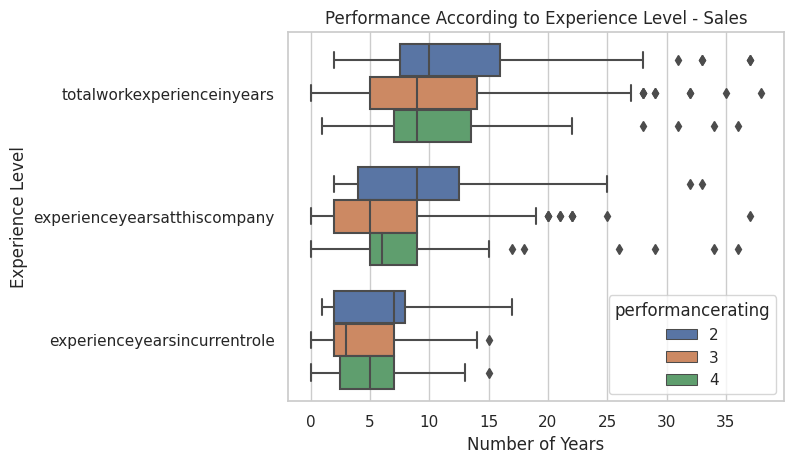

In [ ]:
sns.set(style='whitegrid')

sns.boxplot(x='years', y='experiencelevel', hue='performancerating', data=melted_data)
plt.xlabel('Number of Years')
plt.ylabel('Experience Level')
plt.title('Performance According to Experience Level - Sales')


plt.show()

Data provides insights into the distribution of experience years among employees based on different experience levels and performance ratings. It allows us to analyze how the performance ratings align with the employees' total work experience, experience at the current company, and experience in the current role.

In [ ]:
hr = df[df.empdepartment == 'Human Resources']
hr.head(3)

,empnumber,age,gender,educationbackground,maritalstatus,empdepartment,empjobrole,businesstravelfrequency,distancefromhome,empeducationlevel,...,emprelationshipsatisfaction,totalworkexperienceinyears,trainingtimeslastyear,empworklifebalance,experienceyearsatthiscompany,experienceyearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition,performancerating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3


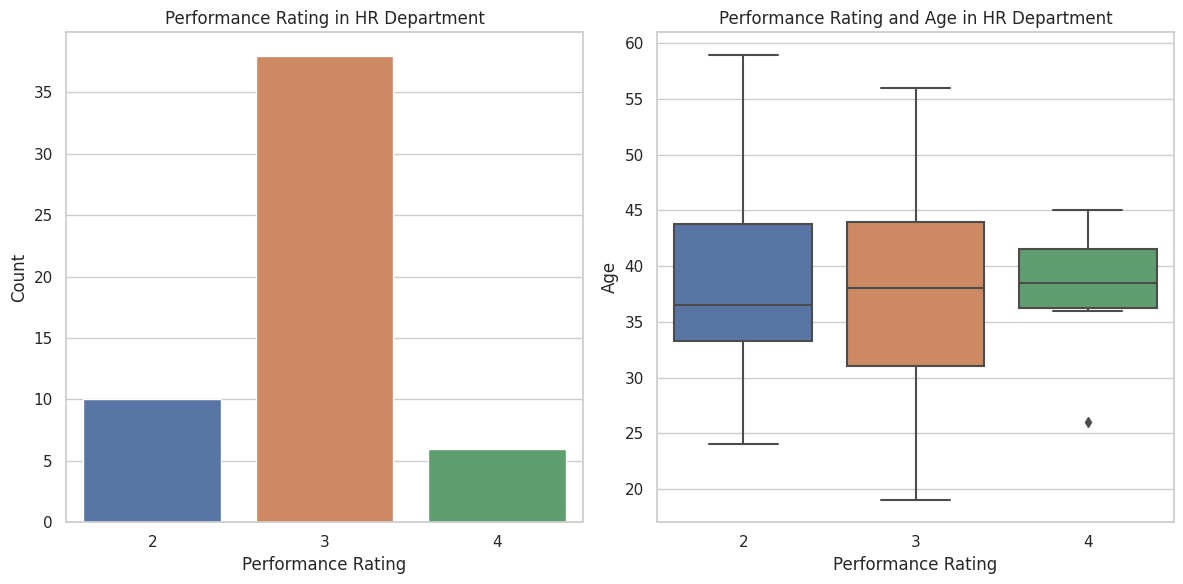

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='performancerating', data=hr, ax=axes[0])
axes[0].set_xlabel('Performance Rating')
axes[0].set_ylabel('Count')
axes[0].set_title('Performance Rating in HR Department')

sns.boxplot(x='performancerating', y='age', data=hr, ax=axes[1])
axes[1].set_xlabel('Performance Rating')
axes[1].set_ylabel('Age')
axes[1].set_title('Performance Rating and Age in HR Department')

plt.tight_layout()

plt.show()

The box plot reveals that employees with performance rating 3 in the HR department tend to fall within the age range of 30 to 45. This age group has a higher concentration of employees with performance rating 3 compared to other age groups.

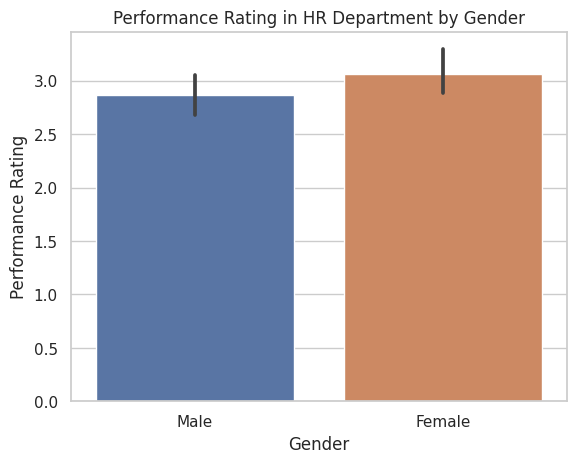

In [ ]:
sns.barplot(x='gender', y='performancerating', data=hr)

plt.xlabel('Gender')
plt.ylabel('Performance Rating')
plt.title('Performance Rating in HR Department by Gender')

plt.show()

Females are performing better compared to males.

In [ ]:
development = df[df['empdepartment'] == 'Development']


In [ ]:
df['empdepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [ ]:
experience_columns = ['totalworkexperienceinyears', 'experienceyearsatthiscompany', 'experienceyearsincurrentrole']


In [ ]:
experience_data = development[experience_columns + ['performancerating']]


In [ ]:
melted_data = experience_data.melt(id_vars='performancerating', var_name='ExperienceLevel', value_name='Years')


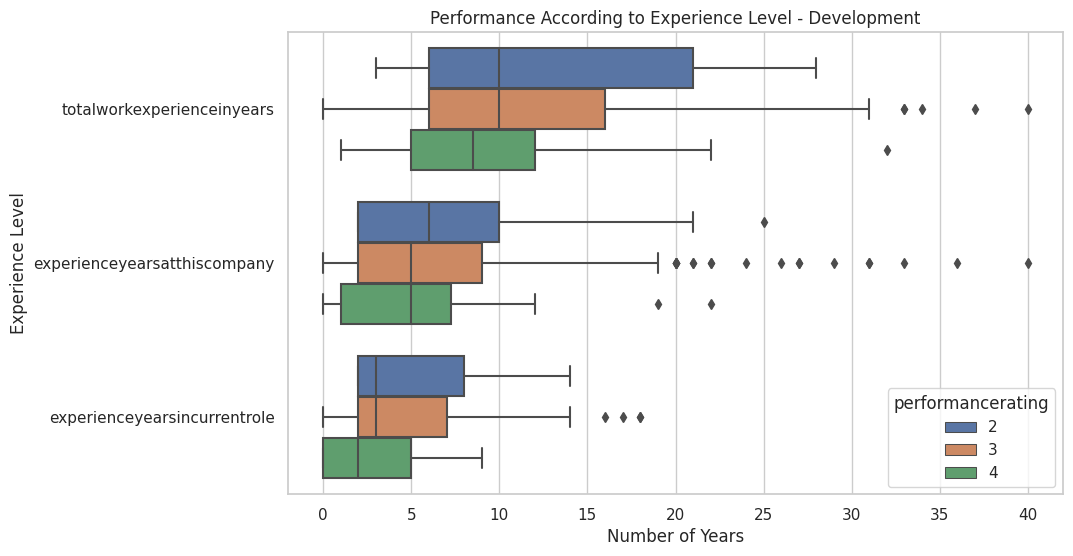

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Years', y='ExperienceLevel', hue='performancerating', data=melted_data)
plt.xlabel('Number of Years')
plt.ylabel('Experience Level')
plt.title('Performance According to Experience Level - Development')

plt.show()

Overall total experience factor is important when ratings are concerned, we can see that performance rating is increasing with total experience



In [ ]:
experience_columns = ['totalworkexperienceinyears', 'performancerating']


In [ ]:
department_data = df.groupby('empdepartment')[experience_columns].mean().reset_index()


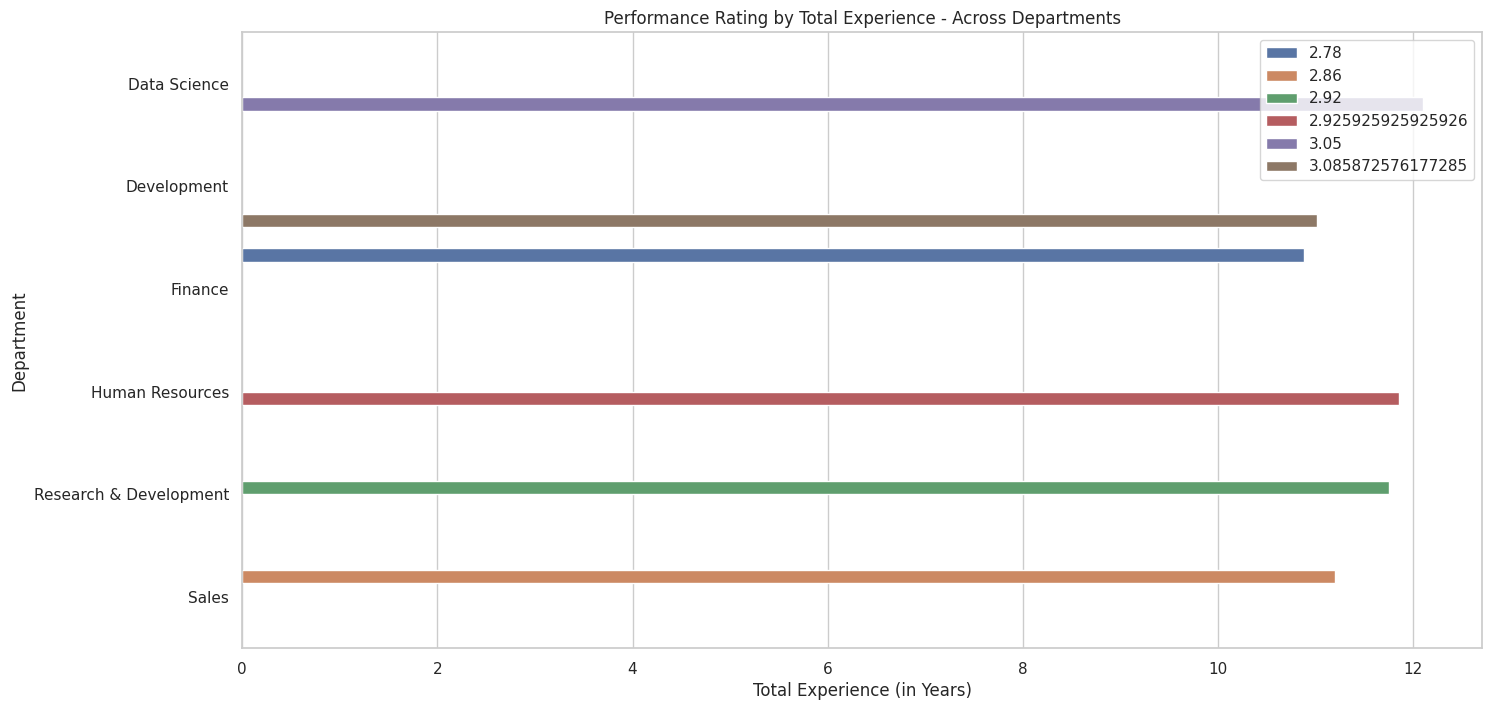

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(16, 8))
sns.barplot(x='totalworkexperienceinyears', y='empdepartment', hue='performancerating', data=department_data)
plt.xlabel('Total Experience (in Years)')
plt.ylabel('Department')
plt.title('Performance Rating by Total Experience - Across Departments')

plt.legend(loc='upper right')

legend = plt.gca().get_legend()
legend.texts[0].set_text(round(float(legend.texts[0].get_text()), 2))
legend.texts[1].set_text(round(float(legend.texts[1].get_text()), 2))
legend.texts[2].set_text(round(float(legend.texts[2].get_text()), 2))
plt.show()

HR and development have hights performers

In [ ]:
Data_Science =df[df.empdepartment == 'Data Science']
Data_Science.head(3)

,empnumber,age,gender,educationbackground,maritalstatus,empdepartment,empjobrole,businesstravelfrequency,distancefromhome,empeducationlevel,...,emprelationshipsatisfaction,totalworkexperienceinyears,trainingtimeslastyear,empworklifebalance,experienceyearsatthiscompany,experienceyearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition,performancerating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3


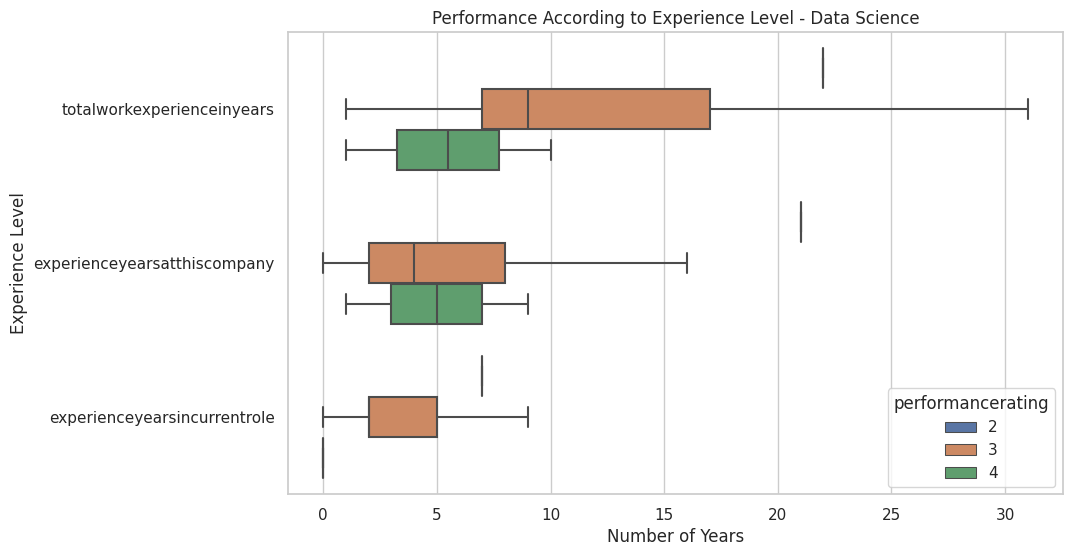

In [ ]:
data_science = df[df['empdepartment'] == 'Data Science']

experience_columns = ['totalworkexperienceinyears', 'experienceyearsatthiscompany', 'experienceyearsincurrentrole']
experience_data = data_science[experience_columns + ['performancerating']]
melted_data = experience_data.melt(id_vars='performancerating', var_name='ExperienceLevel', value_name='Years')

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Years', y='ExperienceLevel', hue='performancerating', data=melted_data)
plt.xlabel('Number of Years')
plt.ylabel('Experience Level')
plt.title('Performance According to Experience Level - Data Science')

plt.show()


Box plot indicates that Data science with years of experices are performing better with rating 3

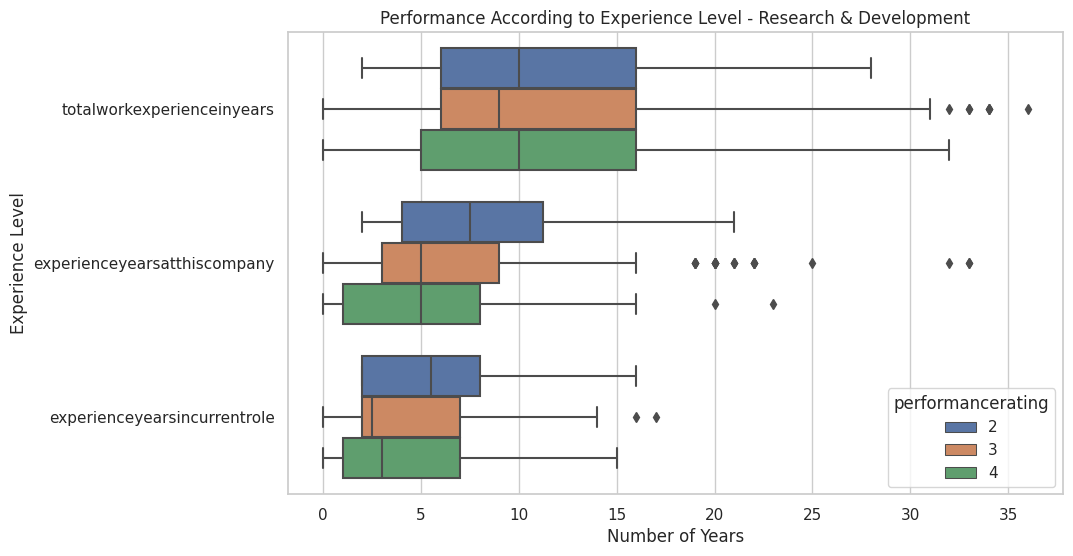

In [ ]:
# Filter the DataFrame for the Research & Development department
research_dev = df[df['empdepartment'] == 'Research & Development']

experience_columns = ['totalworkexperienceinyears', 'experienceyearsatthiscompany', 'experienceyearsincurrentrole']

experience_data = research_dev[experience_columns + ['performancerating']]
melted_data = experience_data.melt(id_vars='performancerating', var_name='ExperienceLevel', value_name='Years')


sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Years', y='ExperienceLevel', hue='performancerating', data=melted_data)
plt.xlabel('Number of Years')
plt.ylabel('Experience Level')
plt.title('Performance According to Experience Level - Research & Development')

plt.show()


Overall total experience factor is important when ratings are concerned, we can see that performance rating is increasing with total experience

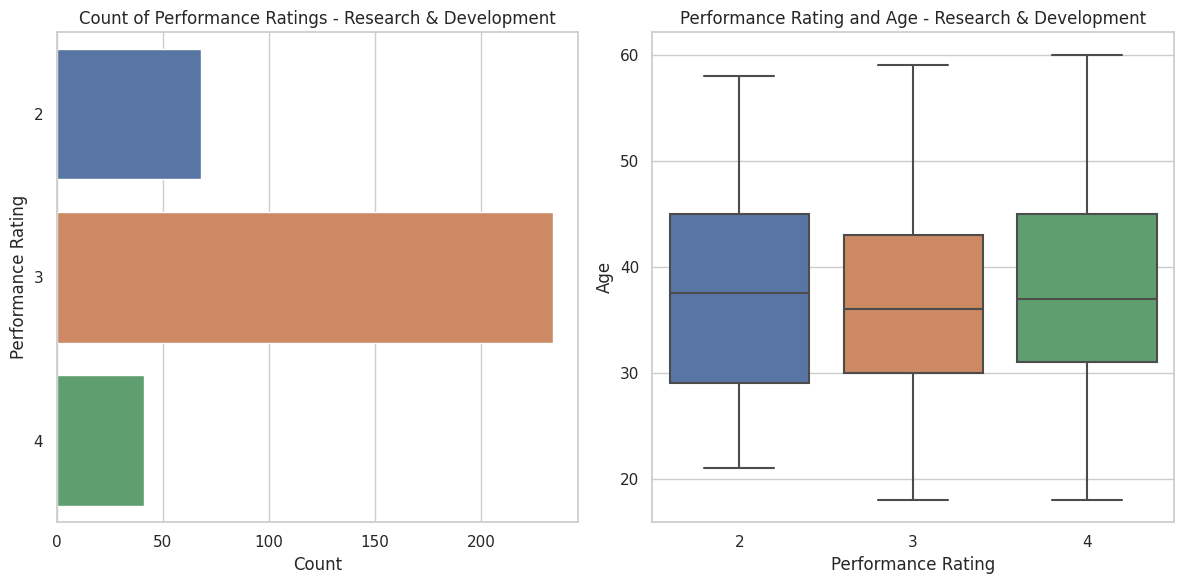

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(y="performancerating", data=research_dev, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Performance Rating')
axes[0].set_title('Count of Performance Ratings - Research & Development')

sns.boxplot(x=research_dev['performancerating'], y=research_dev['age'], ax=axes[1])
axes[1].set_xlabel('Performance Rating')
axes[1].set_ylabel('Age')
axes[1].set_title('Performance Rating and Age - Research & Development')

plt.tight_layout()
plt.show()





Age with 30-45 is a peak age , where the performance is increasing

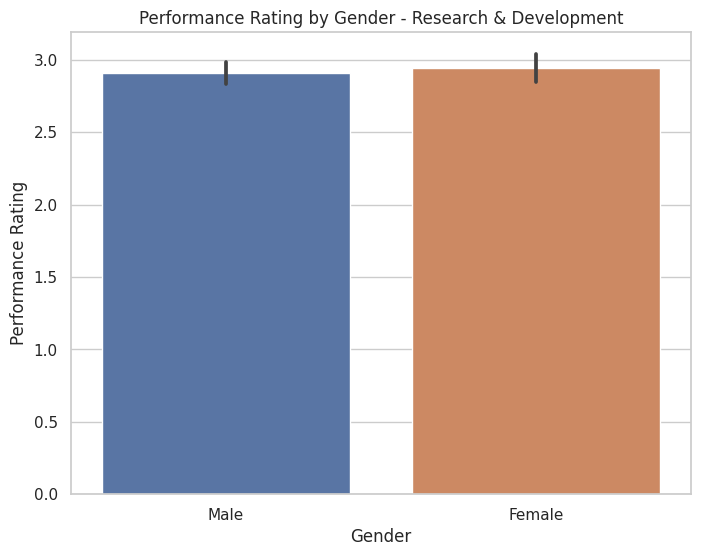

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='performancerating', data=research_dev)
plt.xlabel('Gender')
plt.ylabel('Performance Rating')
plt.title('Performance Rating by Gender - Research & Development')


plt.show()

The distribution og gender is uniform in reaseacrh and development

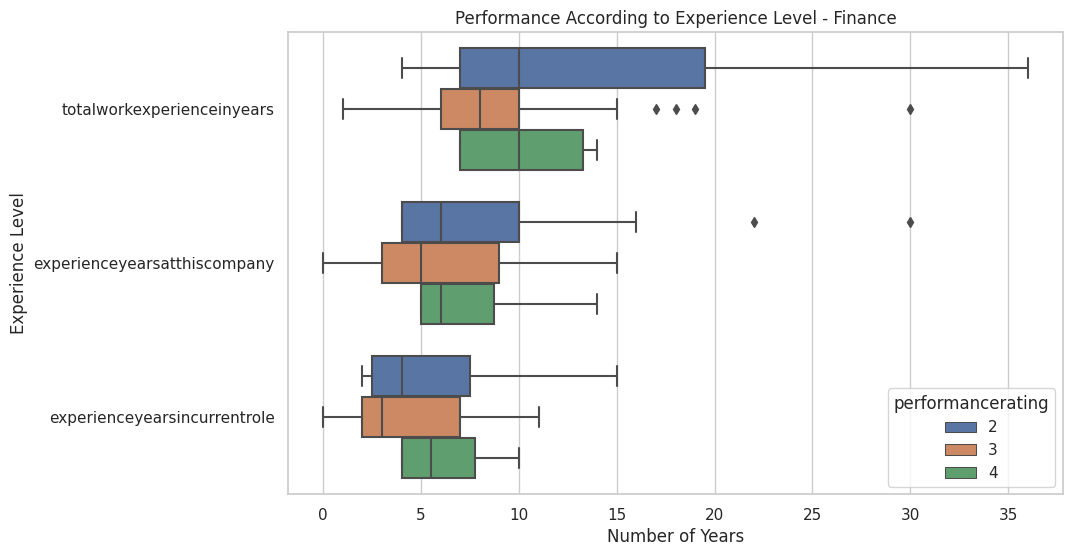

In [ ]:
finance = df[df['empdepartment'] == 'Finance']
experience_columns = ['totalworkexperienceinyears', 'experienceyearsatthiscompany', 'experienceyearsincurrentrole']


experience_data = finance[experience_columns + ['performancerating']]

# Melt the DataFrame to convert it into the appropriate format for box plots
melted_data = experience_data.melt(id_vars='performancerating', var_name='ExperienceLevel', value_name='Years')

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Years', y='ExperienceLevel', hue='performancerating', data=melted_data)
plt.xlabel('Number of Years')
plt.ylabel('Experience Level')
plt.title('Performance According to Experience Level - Finance')

# Display the plot
plt.show()

Overall total experience with company in finance is important factor when ratings are concerned, we can see that performance rating is increasing with total experience

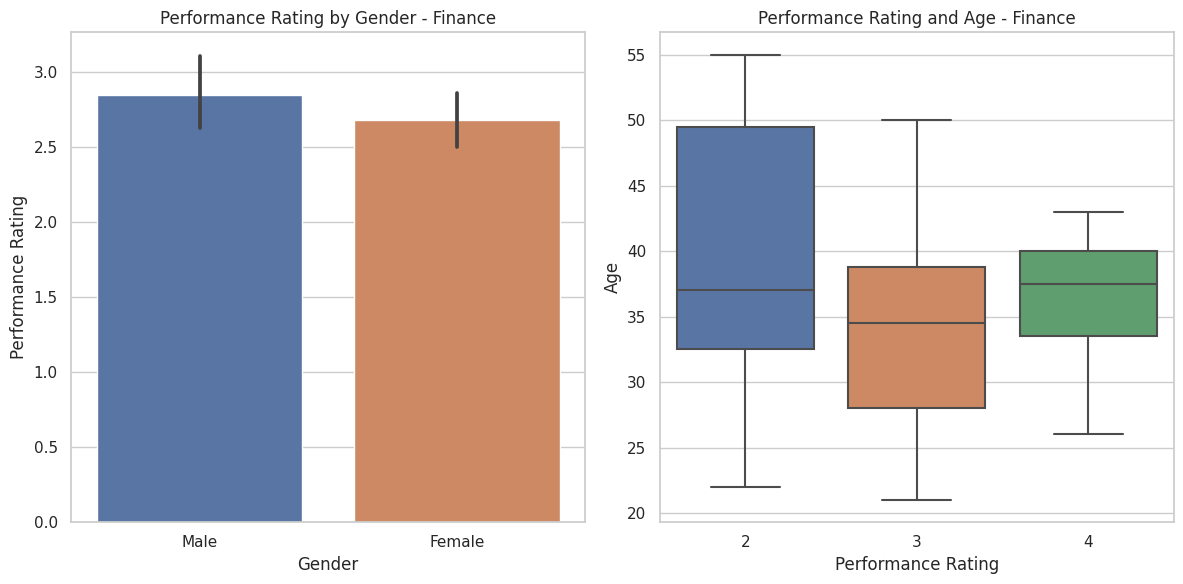

In [ ]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='gender', y='performancerating', data=finance, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Performance Rating')
axes[0].set_title('Performance Rating by Gender - Finance')

sns.boxplot(x='performancerating', y='age', data=finance, ax=axes[1])
axes[1].set_xlabel('Performance Rating')
axes[1].set_ylabel('Age')
axes[1].set_title('Performance Rating and Age - Finance')

plt.tight_layout()
plt.show()

Male distribution a little higher in finance department. 28-40 the age group is the highest performers.

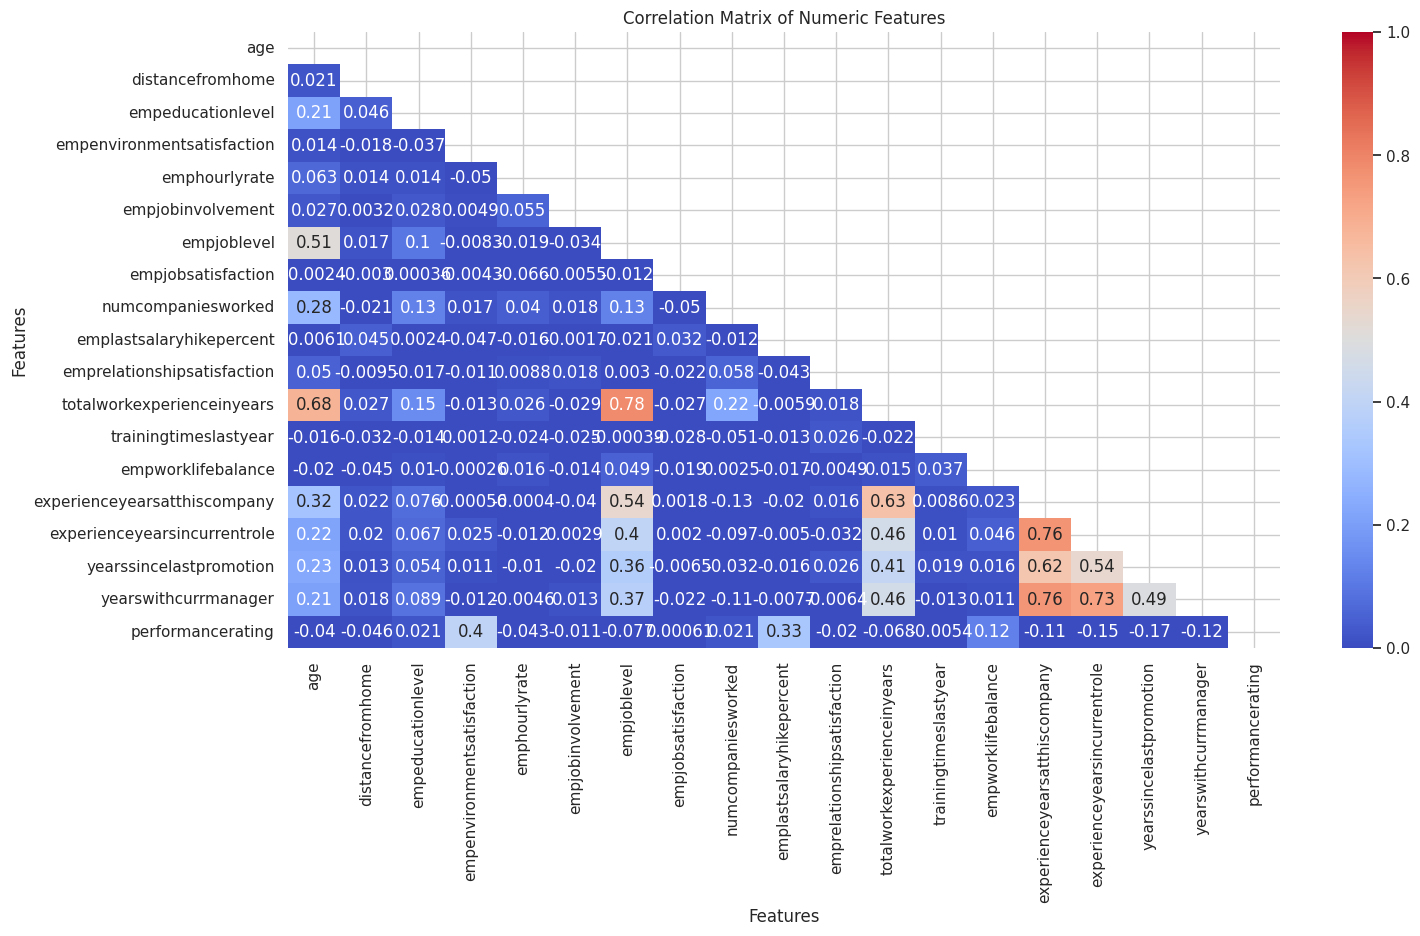

In [ ]:
# heatmap
numeric_columns = df.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 8))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=0, vmax=1)

ax.set_title('Correlation Matrix of Numeric Features')
ax.set_xlabel('Features')
ax.set_ylabel('Features')


plt.show()

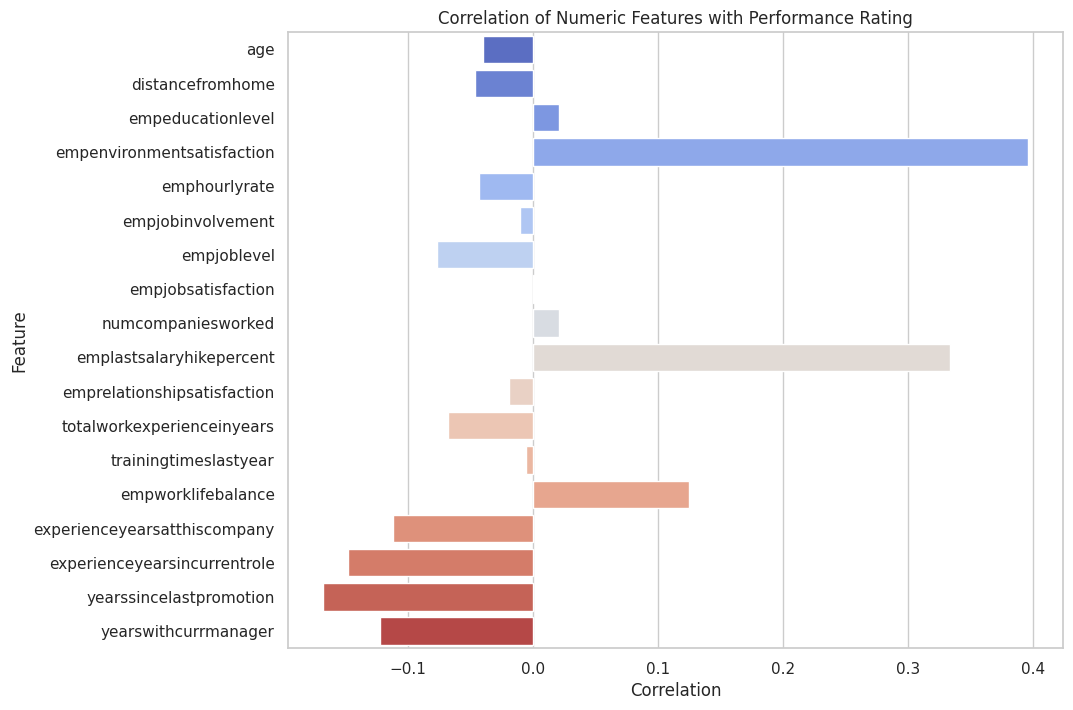

In [ ]:
numeric_columns = df.select_dtypes(include=np.number)

correlation_matrix = numeric_columns.corr()

performance_correlations = correlation_matrix['performancerating'].drop('performancerating')

plt.figure(figsize=(10, 8))
sns.barplot(x=performance_correlations.values, y=performance_correlations.index, palette='coolwarm')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation of Numeric Features with Performance Rating')
plt.show()






In [ ]:
performance_correlations*100
performance_correlations

age                            -0.040164
distancefromhome               -0.046142
empeducationlevel               0.020529
empenvironmentsatisfaction      0.395561
emphourlyrate                  -0.043116
empjobinvolvement              -0.010539
empjoblevel                    -0.076632
empjobsatisfaction              0.000606
numcompaniesworked              0.020980
emplastsalaryhikepercent        0.333722
emprelationshipsatisfaction    -0.019502
totalworkexperienceinyears     -0.068141
trainingtimeslastyear          -0.005443
empworklifebalance              0.124429
experienceyearsatthiscompany   -0.111645
experienceyearsincurrentrole   -0.147638
yearssincelastpromotion        -0.167629
yearswithcurrmanager           -0.122313
Name: performancerating, dtype: float64

In summary, the analysis reveals several variables that have a positive or negative correlation with the performance rating. Factors such as education level, environment satisfaction, salary hike percentage, work-life balance, and number of companies worked show positive correlations. On the other hand, variables like age, distance from home, hourly rate, job involvement, job level, total work experience, experience at the current company, experience in the current role, years since the last promotion, and years with the current manager display negative correlations. These insights can help understand the potential influence of these variables on an employee's performance rating.

**TOP 3 FACTORS EFFECTING EMPLOYEE PERFORMANC**

In [ ]:
correlation_matrix[correlation_matrix.performancerating>0.1]

,age,distancefromhome,empeducationlevel,empenvironmentsatisfaction,emphourlyrate,empjobinvolvement,empjoblevel,empjobsatisfaction,numcompaniesworked,emplastsalaryhikepercent,emprelationshipsatisfaction,totalworkexperienceinyears,trainingtimeslastyear,empworklifebalance,experienceyearsatthiscompany,experienceyearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,performancerating
empenvironmentsatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
emplastsalaryhikepercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722
empworklifebalance,-0.019563,-0.044788,0.010276,-0.000262,0.016189,-0.014129,0.049218,-0.018548,0.002489,-0.017001,-0.004906,0.015495,0.037048,1.000000,0.023479,0.045719,0.015773,0.010518,0.124429
performancerating,-0.040164,-0.046142,0.020529,0.395561,-0.043116,-0.010539,-0.076632,0.000606,0.020980,0.333722,-0.019502,-0.068141,-0.005443,0.124429,-0.111645,-0.147638,-0.167629,-0.122313,1.000000


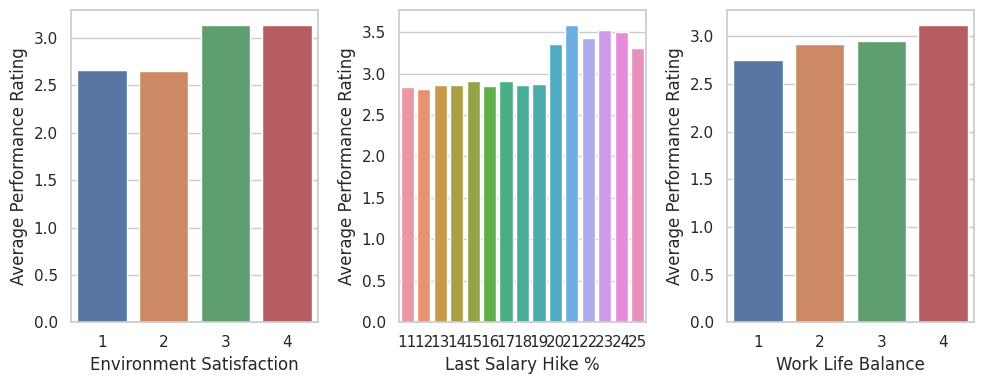

In [ ]:
subset_df = df[['empenvironmentsatisfaction', 'emplastsalaryhikepercent', 'empworklifebalance', 'performancerating']]

avg_rating_by_env_satisfaction = subset_df.groupby('empenvironmentsatisfaction')['performancerating'].mean()
avg_rating_by_last_salary_hike = subset_df.groupby('emplastsalaryhikepercent')['performancerating'].mean()
avg_rating_by_work_life_balance = subset_df.groupby('empworklifebalance')['performancerating'].mean()

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=avg_rating_by_env_satisfaction.index, y=avg_rating_by_env_satisfaction.values)
plt.xlabel('Environment Satisfaction')
plt.ylabel('Average Performance Rating')

plt.subplot(1, 3, 2)
sns.barplot(x=avg_rating_by_last_salary_hike.index, y=avg_rating_by_last_salary_hike.values)
plt.xlabel('Last Salary Hike %')
plt.ylabel('Average Performance Rating')

plt.subplot(1, 3, 3)
sns.barplot(x=avg_rating_by_work_life_balance.index, y=avg_rating_by_work_life_balance.values)
plt.xlabel('Work Life Balance')
plt.ylabel('Average Performance Rating')

plt.tight_layout()
plt.show()


Environment Satisfaction: The average performance rating tends to be higher for employees with higher levels of environment satisfaction. This suggests that employees who perceive their work environment positively are more likely to achieve higher performance ratings. Organizations should focus on creating a conducive and satisfactory work environment to enhance employee performance.

Last Salary Hike Percentage: There seems to be a moderate association between the last salary hike percentage and the performance rating. Employees with higher last salary hike percentages tend to have higher average performance ratings. This implies that salary hikes and rewards can positively impact employee motivation and performance. It's important for organizations to consider fair and competitive salary increments to foster employee satisfaction and performance.

Work-Life Balance: The average performance rating appears to be influenced by the work-life balance of employees. Those with better work-life balance tend to exhibit higher performance ratings. This suggests that maintaining a healthy balance between work demands and personal life is beneficial for employee performance. Employers should promote policies and practices that support work-life balance, such as flexible work hours, remote work options, and employee well-being initiatives.

### **MOdelling:**

In [ ]:
df['performancerating'].value_counts()

3    874
2    194
4    132
Name: performancerating, dtype: int64

In [ ]:
mapping = {2: 0, 3: 1, 4: 2}

df['performancerating'] = df['performancerating'].map(mapping)


print(df['performancerating'])

0       1
1       1
2       2
3       1
4       1
       ..
1195    2
1196    1
1197    1
1198    1
1199    0
Name: performancerating, Length: 1200, dtype: int64


The target variable is imbalanced because the number of occurrences for each rating category is not roughly equal. Rating 3 has significantly more occurrences compared to Ratings 2 and 4.

In [ ]:
X = df.drop(['performancerating'],axis=1)
y= df['performancerating']

**Split the Data into Training and Testing**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Random Forest Classifier model**

In [ ]:
categorical_cols = ['gender', 'educationbackground', 'maritalstatus', 'empdepartment', 'empjobrole', 'businesstravelfrequency']
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Define the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced', random_state=0)),
    ('SVC', SVC(class_weight='balanced', random_state=0)),
    ('Random Forest', RandomForestClassifier(class_weight='balanced', random_state=0)),
    ('XGBoost', XGBClassifier(random_state=0)),
    ('Neural Network', MLPClassifier(random_state=0))
]

# Define the scaling options
scalers = [
    ('StandardScaler', StandardScaler()),
    ('MinMaxScaler', MinMaxScaler()),
    ('RobustScaler', RobustScaler())
]

best_accuracy = 0.0
best_scaler = None
best_classifier = None

# Iterate over classifiers and scaling options
for classifier_name, classifier in classifiers:
    for scaler_name, scaler in scalers:
              # Preprocessing steps for numerical and categorical features
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', scaler, numerical_cols),
                ('cat', OneHotEncoder(), categorical_cols)
            ])

        # Create a pipeline with the preprocessor and classifier
        pipeline = make_pipeline(preprocessor, classifier)

        # Fit the pipeline
        pipeline.fit(X_train, y_train)

        # Predict
        y_pred = pipeline.predict(X_test)

        # accuracy
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Classifier: {classifier_name}, Scaler: {scaler_name}, Accuracy: {accuracy:.4f}")




Classifier: Logistic Regression, Scaler: StandardScaler, Accuracy: 0.7400
Classifier: Logistic Regression, Scaler: MinMaxScaler, Accuracy: 0.7300
Classifier: Logistic Regression, Scaler: RobustScaler, Accuracy: 0.7367
Classifier: SVC, Scaler: StandardScaler, Accuracy: 0.7733
Classifier: SVC, Scaler: MinMaxScaler, Accuracy: 0.7467
Classifier: SVC, Scaler: RobustScaler, Accuracy: 0.7500
Classifier: Random Forest, Scaler: StandardScaler, Accuracy: 0.9167
Classifier: Random Forest, Scaler: MinMaxScaler, Accuracy: 0.9167
Classifier: Random Forest, Scaler: RobustScaler, Accuracy: 0.9200
Classifier: XGBoost, Scaler: StandardScaler, Accuracy: 0.9533
Classifier: XGBoost, Scaler: MinMaxScaler, Accuracy: 0.9533
Classifier: XGBoost, Scaler: RobustScaler, Accuracy: 0.9533
Classifier: Neural Network, Scaler: StandardScaler, Accuracy: 0.8000
Classifier: Neural Network, Scaler: MinMaxScaler, Accuracy: 0.8067
Classifier: Neural Network, Scaler: RobustScaler, Accuracy: 0.8033


We can see here Xgboost achieved highest score

**XGBOOST cross validation**

Average Accuracy: 0.9022


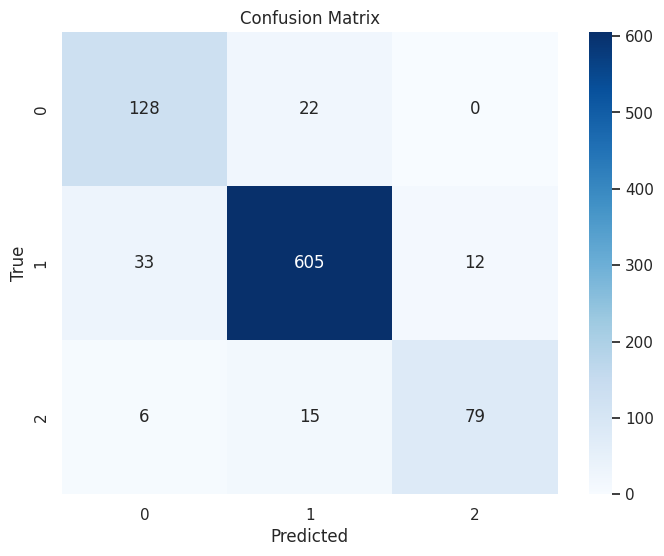

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.94      0.93      0.94       650
           2       0.87      0.79      0.83       100

    accuracy                           0.90       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.90      0.90      0.90       900



In [ ]:
n_folds = 5

#tratifiedShuffleSplit object
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=n_folds, test_size=0.2, random_state=0)


accuracy_scores = []
y_preds = []
y_vals = []

# Iterate over each fold in the stratified shuffle-split cross-validation loop
for train_index, val_index in stratified_shuffle_split.split(X_train, y_train):


    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    pipeline.fit(X_train_fold, y_train_fold)

    # Predict on the validation data for the current fold
    y_pred_fold = pipeline.predict(X_val_fold)


    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

    # Collect predictions and true labels for all folds
    y_preds.extend(y_pred_fold)
    y_vals.extend(y_val_fold)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")

#  confusion matrix
cm = confusion_matrix(y_vals, y_preds)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# classification report
classification_rep = classification_report(y_vals, y_preds)
print(classification_rep)



The XGBoost classifier with Stratified Shuffle Split cross-validation (cv=5) achieved an average accuracy of 0.9022 on the test set.

The classification report


The model achieved the highest precision, recall, and F1-score for class 1, indicating good performance in correctly identifying this class.

Class 0 and class 2 also had reasonably good precision, recall, and F1-scores, but slightly lower than class 1.

The overall accuracy of the model is 0.902, indicating its ability to make correct predictions.

The macro average F1-score is 0.86, suggesting a balanced performance across all classes.

The weighted average F1-score is also 0.90, indicating the model's ability to generalize well across all classes while considering the class imbalance.

Based on these results, we can conclude that the XGBoost classifier with Stratified Shuffle Split cross-validation is performing well in classifying the target variable. It shows promising results in accurately predicting the different classes, with class 1 having the highest performance. However, further analysis and tuning may be required to improve the performance on classes 0 and 2, if necessary.



In [ ]:
feature_importances = pipeline.named_steps['xgbclassifier'].feature_importances_

feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

top_features = feature_importances_df.head(10)['Feature'].tolist()
print('Top 10 Features:')
print(top_features)

Top 10 Features:
['empenvironmentsatisfaction', 'emplastsalaryhikepercent', 'yearssincelastpromotion', 'empdepartment_Development', 'overtime_No', 'businesstravelfrequency_Non-Travel', 'experienceyearsincurrentrole', 'overtime_Yes', 'businesstravelfrequency_Travel_Frequently', 'gender_Female']


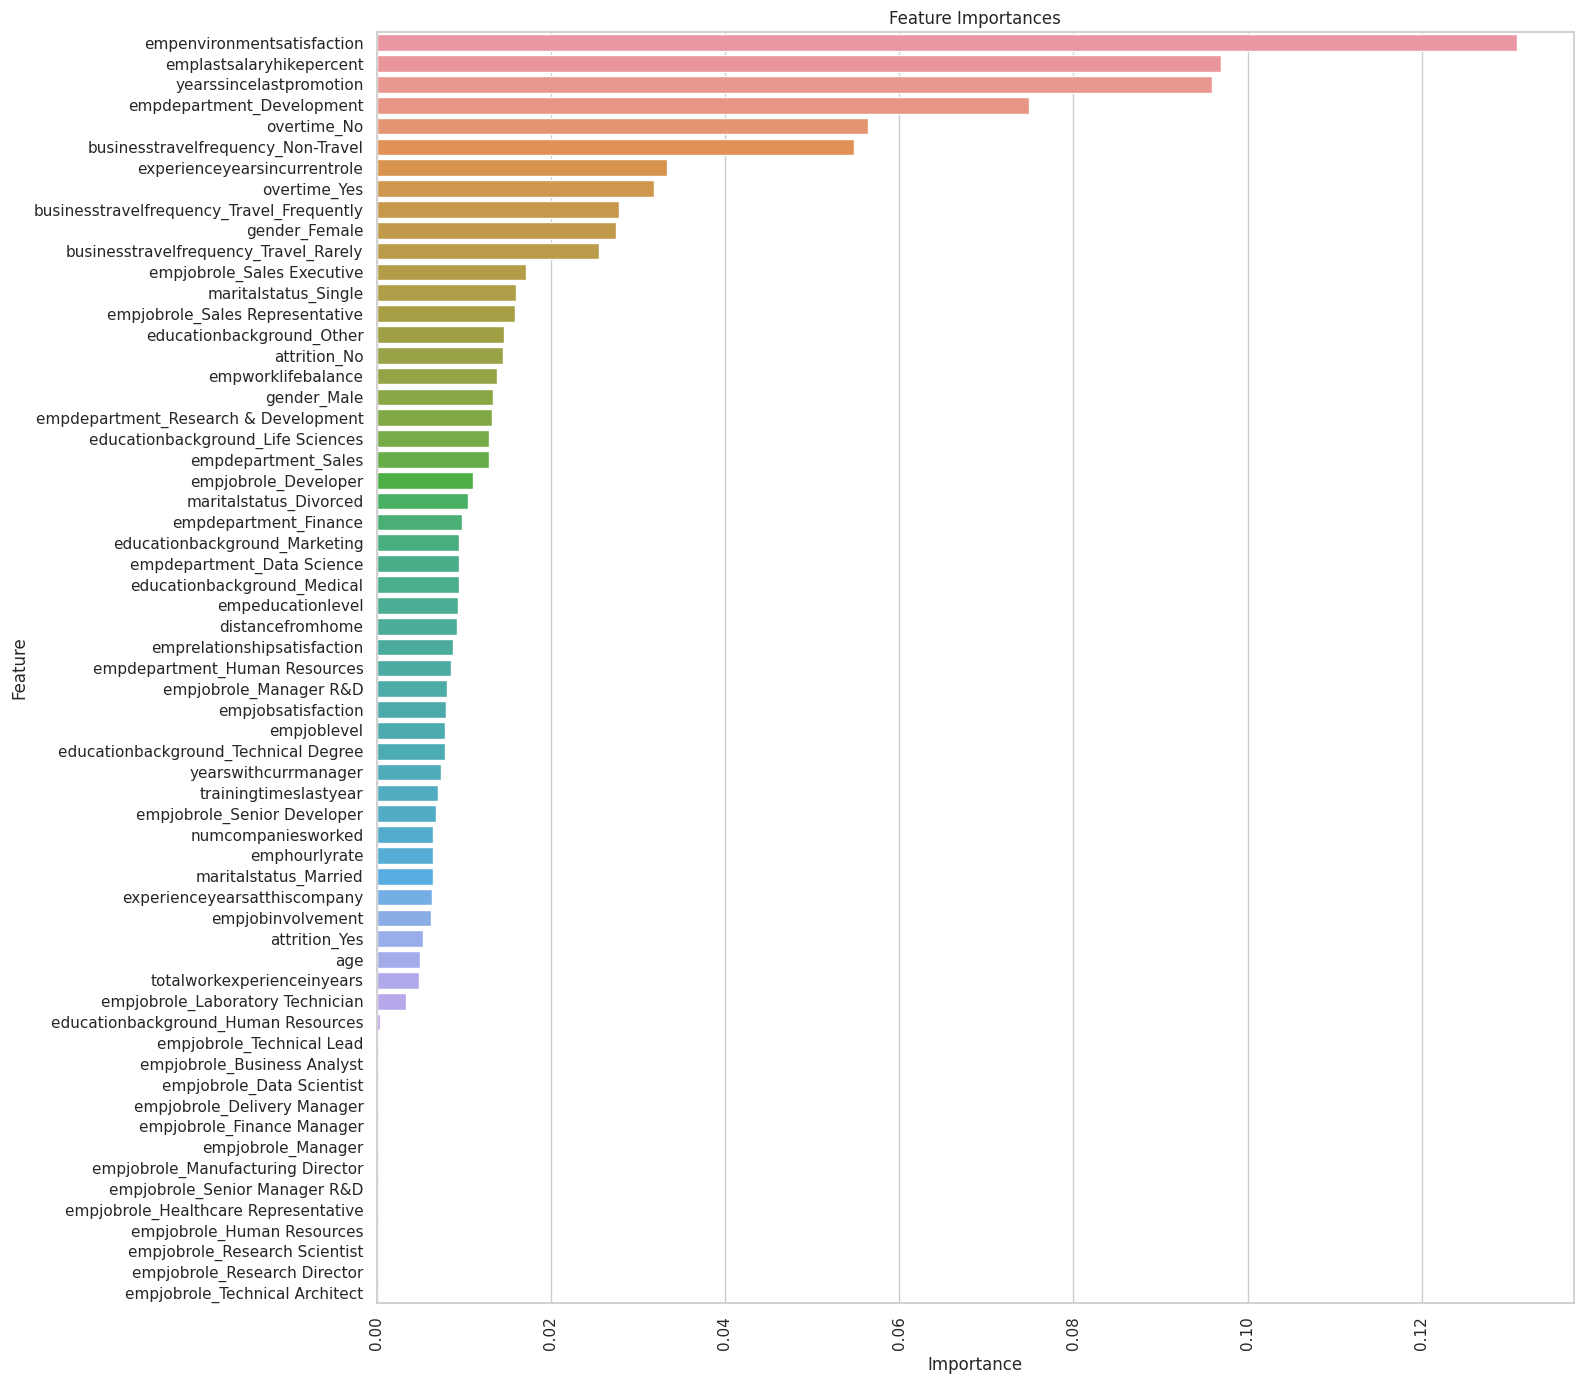

In [ ]:
# Plot the feature importances
plt.figure(figsize=(16, 14))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


The most important features according to the xgboost is

empenvironmentsatisfaction,

emplastsalaryhikepercent,

yearssincelastpromotion,

empdepartment_Development,

overtime_No,

businesstravelfrequency_Non-Travel,

experienceyearsincurrentrole,

overtime_Yes,

businesstravelfrequency_Travel_Frequently,

gender_Female


In [ ]:
from joblib import dump


# Save the best model
dump(pipeline, 'best_model')

['best_model']

## **Conclusion:**

The most important technique used in this project include data preprocessing (such as one-hot encoding, scaling, and handling imbalanced data), machine learning algorithms (such as XGBoost, Logistic Regression, SVC, Random Forest, and Neural Network), cross-validation for model evaluation, and performance metrics (accuracy, confusion matrix, classification report).

These technique playyed a crucial role in the overall analysis and contributes to model training, evaluation, and interpretation.

XGBOOST is the best model among all the tried models.

Features provide insights into the factors that influence employee performance ratings in the given dataset. It suggests that factors such as job satisfaction, salary hikes, promotion opportunities, department, overtime, business travel, experience in the current role, and gender may contribute to employees' performance.

**Recommendations**

Environment Satisfaction: Improving employee satisfaction with the work environment can have a positive impact on their performance. Organizations should focus on creating a positive and supportive work environment that promotes employee satisfaction.

Salary Hike Percentage: Providing regular and substantial salary hikes can motivate employees and enhance their performance. Organizations should consider fair and competitive compensation practices to reward employees appropriately.

Promotion Opportunities: Employees who have been promoted more recently tend to have higher performance ratings. Organizations should ensure fair and transparent promotion processes and provide growth opportunities to deserving employees.

Department Impact: The Development department appears to have a positive influence on performance ratings. Understanding the factors contributing to this positive impact can help other departments identify areas for improvement and implement strategies to enhance employee performance.

Overtime and Business Travel: Managing overtime work and business travel frequency is crucial. While working overtime may affect performance negatively, limiting excessive overtime and finding ways to balance workload can help maintain employee productivity. Similarly, reducing frequent business travel, when possible, may positively impact employee performance.

Experience in Current Role: Employees with more experience in their current role tend to have higher performance ratings. Organizations should provide ongoing training and development opportunities to enhance employee skills and expertise, even within their current roles.

Gender: The analysis suggests that female employees tend to have higher performance ratings. Organizations should ensure equal opportunities and address any gender-related biases to foster a diverse and inclusive work environment.

Based on these insights, organizations can consider implementing strategies such as improving work environment satisfaction, providing competitive compensation and promotion opportunities, managing overtime and business travel effectively, investing in employee development, and promoting gender diversity and inclusion. These measures can contribute to improved employee performance and overall organizational success.
